![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Comparing Images** - motion detection uchun judayam zarur mavzu. Kelajakda threshold qo'yib motion detection code of piece yozsa bo'ladi

####**In this lesson we'll learn:**
1. Compare Images using Mean Squared Error (MSE) 
2. UCompare Images using Structual Similarity

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# 1.**Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [40]:
#images must be same dimension 
def mse(image1, image2):  
    error = np.sum((image1.astype('float') - image2.astype('float'))**2) #subtract two images and square it 
    error /=float(image1.shape[0]*image1.shape[1]) #and devide in image area (yuzi) in order to decrease compute 
    
    return error

#### **Let's get 3 images**

1. Fireworks1
2. Fireworks1 with brightness enhanced
3. Fireworks2

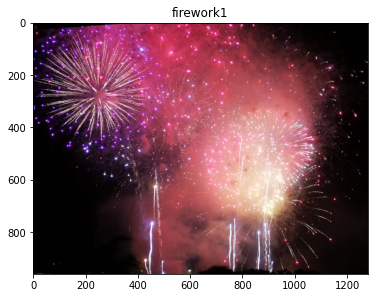

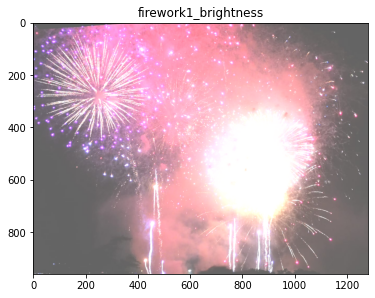

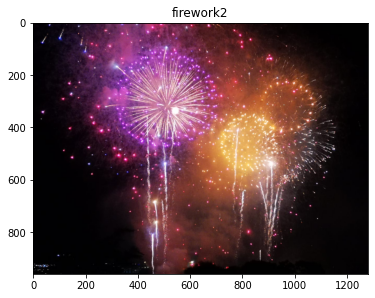

In [43]:
firework1 = cv2.imread('Datasets/images/fireworks.jpeg')
firework2 = cv2.imread('Datasets/images/fireworks2.jpeg')

M = np.ones((firework1.shape),dtype='uint8') * 100
firework1_brightness = cv2.add(firework1, M) 

imshow('firework1', firework1)
imshow('firework1_brightness', firework1_brightness)
imshow('firework2', firework2)


# 1.**Skimage structural similarity**

In [44]:
from skimage.metrics import structural_similarity
def compare(image1, image2): 
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    error = mse(image1, image2) #mse function 
    ss = structural_similarity(image1, image2) #compare similarity between two images
    
    print(f"MSE Error: {error:.2f}")
    print(f"Sturctural similarity: {ss:.2f}")

# Let's compare  
#Rules: 
### The more MSE error is lower the more images are same
### Structural similarity between in range 0 and 1. It depicts how many percentage images are similar

In [48]:
#When two images are same
compare(firework1, firework1) 

MSE Error: 0.00
Sturctural similarity: 1.00


In [49]:
#when two images are different
compare(firework1, firework2)

MSE Error: 2125.41
Sturctural similarity: 0.48


In [50]:
#When one of images nearly some changed
compare(firework1, firework1_brightness)

MSE Error: 8809.38
Sturctural similarity: 0.52


In [51]:
# Two other images 
compare(firework1_brightness, firework2)

MSE Error: 13418.54
Sturctural similarity: 0.19
